# Foundations of Data Science - CMU Portugal Academy

> In this notebook, we will introduce scikit-learn, and experiment with some of the library features. 
> 
> Instructors:
>   - David Semedo (df.semedo@fct.unl.pt)
>   - Rafael Ferreira (rah.ferreira@campus.fct.unl.pt)
>
Based on the Python Data Science Handbook Notebooks: https://github.com/jakevdp/PythonDataScienceHandbook.

### Data Representation in Scikit-Learn

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented.
The best way to think about data within Scikit-Learn is in terms of *tables*.

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas `DataFrame` using the [Seaborn](http://seaborn.pydata.org/) library, and take a look at the first few items:

In [59]:
import seaborn as sns
iris = sns.load_dataset('iris')

# Keep only two classes: setosa and virginica
iris = iris[(iris["species"] == "setosa") | (iris["species"] == "virginica")]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as `n_samples`.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as `n_features`.

### The Features Matrix

The table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *design matrix*.
By convention, this matrix is often stored in a variable named `X`.
The design matrix is assumed to be two-dimensional, with shape `[n_samples, n_features]`, and is most often contained in a NumPy array or a Pandas `DataFrame`, though some Scikit-Learn models also accept SciPy sparse matrices.

The samples (i.e., rows) always refer to the individual objects described by the dataset.
For example, a sample might represent a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.
Features are often real-valued, but may be Boolean or discrete-valued in some cases.

### The Target Array

In addition to the feature matrix `X`, we also generally work with a *label* or *target* array, which by convention we will usually call `y`.
The target array is usually one-dimensional, with length `n_samples`, and is generally contained in a NumPy array or Pandas `Series`.
The target array may have continuous numerical values, or discrete classes/labels.
While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, `[n_samples, n_targets]` target array, we will primarily be working with the common case of a one-dimensional target array.

With this target array in mind, we can use Seaborn (discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)) to conveniently visualize the data (see the following figure):

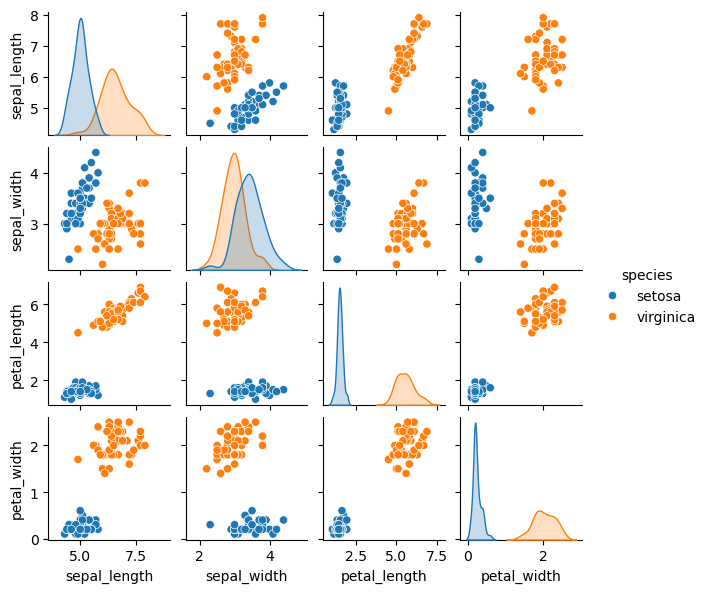

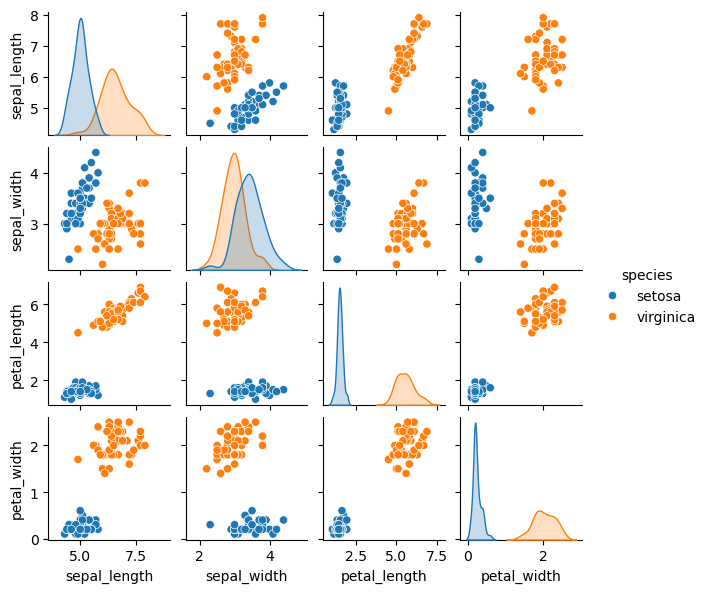

In [61]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue='species', height=1.5)
plt.show()

For use in Scikit-Learn, we will extract the design matrix and target array from the `DataFrame`, which we can do using some of the Pandas `DataFrame` operations:

In [62]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(100, 4)

In [63]:
y_iris = iris['species']
y_iris.shape

(100,)

## The Estimator API

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238):

- *Consistency*: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- *Inspection*: All specified parameter values are exposed as public attributes.

- *Limited object hierarchy*: Only algorithms are represented by Python classes; datasets are represented
  in standard formats (NumPy arrays, Pandas `DataFrame` objects, SciPy sparse matrices) and parameter
  names use standard Python strings.

- *Composition*: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.

- *Sensible defaults*: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood.
Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

### Basics of the API

Most commonly, the steps in using the Scikit-Learn Estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a design matrix and target vector, as outlined earlier in this chapter.
4. Fit the model to your data by calling the `fit` method of the model instance.
5. Apply the model to new data:
   - For supervised learning, often we predict labels for unknown data using the `predict` method.
   - For unsupervised learning, we often transform or infer properties of the data using the `transform` or `predict` method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.

### Supervised Learning Example: Simple Linear Regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to $(x, y)$ data.
We will use the following simple data for our regression example (see the following figure):

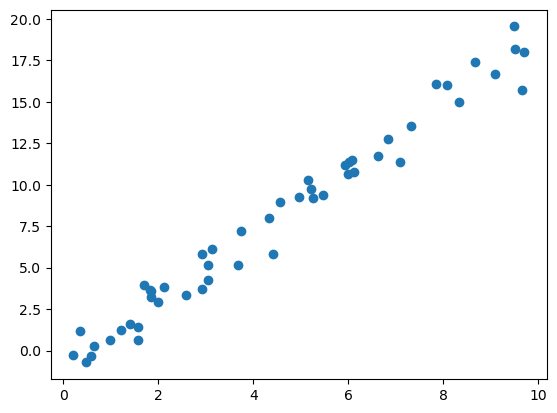

In [64]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)
plt.show()

#### 1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple `LinearRegression` model, we can import the linear regression class:

In [65]:
from sklearn.linear_model import LinearRegression

Note that other more general linear regression models exist as well; you can read more about them in the [`sklearn.linear_model` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

#### 2. Choose model hyperparameters

An important point is that *a class of model is not the same as an instance of a model*.

Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., *y*-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

These are examples of the important choices that must be made *once the model class is selected*.
These choices are often represented as *hyperparameters*, or parameters that must be set before the model is fit to data.
In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.
We will explore how you can quantitatively choose hyperparameters in the next lecture.

For our linear regression example, we can instantiate the `LinearRegression` class and specify that we would like to fit the intercept (the bias parameter) using the `fit_intercept` hyperparameter:

In [66]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.
In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between *choice of model* and *application of model to data*.

#### 3. Arrange data into a features matrix and target vector

Previously we examined the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array.
Here our target variable `y` is already in the correct form (a length-`n_samples` array), but we need to massage the data `x` to make it a matrix of size `[n_samples, n_features]`.
In this case, this amounts to a simple reshaping of the one-dimensional array:

In [67]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the model to the data

Now it is time to apply our model to the data.
This can be done with the `fit` method of the model:

In [68]:
model.fit(X, y)

LinearRegression()

This `fit` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
In Scikit-Learn, by convention all model parameters that were learned during the `fit` process have trailing underscores; for example in this linear model, we have the following:

In [69]:
model.coef_

array([1.9776566])

In [70]:
model.intercept_

-0.9033107255311146

These two parameters represent the slope and intercept of the simple linear fit to the data.
Comparing the results to the data definition, we see that they are close to the values used to generate the data: a slope of 2 and intercept of –1.

One question that frequently comes up regards the uncertainty in such internal model parameters.
In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a *statistical modeling* question than a *machine learning* question.
Machine learning instead focuses on what the model *predicts*.
If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the [`statsmodels` Python package](http://statsmodels.sourceforge.net/).

#### 5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the `predict` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

In [71]:
xfit = np.linspace(-1, 11)

As before, we need to coerce these *x* values into a `[n_samples, n_features]` design matrix, after which we can feed it to the model:

In [72]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit (see the following figure):

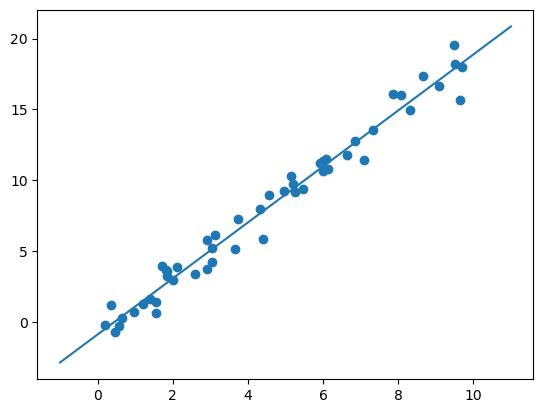

In [73]:
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example.

### Supervised Learning Example: Iris Classification

Let's take a look at another example of this process, using the Iris dataset we discussed earlier.
Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use a logistic regression classifier: [https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html).

We would like to evaluate the model on data it has not seen before, so we will split the data into a *training set* and a *testing set*.
This could be done by hand, but it is more convenient to use the `train_test_split` utility function:

In [74]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)
print("Existing labels: ", list(set(ytest)))

(75, 4) (25, 4) (75,) (25,)
Existing labels:  ['virginica', 'setosa']


With the data arranged, we can follow our recipe to predict the labels:

In [75]:
from sklearn.linear_model import LogisticRegression  # 1. choose model class
model = LogisticRegression(random_state=0)           # 2. instantiate model
model.fit(Xtrain, ytrain)                            # 3. fit model to data
y_model = model.predict(Xtest)                       # 4. predict on new data

We can now inspect the learned coefficients and bias term:

In [76]:
print(model.coef_.shape, model.coef_)
print(model.intercept_.shape, model.intercept_)

(1, 4) [[ 0.54224576 -0.2374557   1.69046149  0.78360361]]
(1,) [-9.0488339]


Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true values:

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

1.0

As discussed in the lecture, accuracy does not tell per see the full story, with respect to the performance of the model.
We can use the function `classification_report` from scikit-learn, to compute the common metrics, given the model predictions on the test set:

In [78]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_model))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



Let's now plot a confusion matrix, over the different classes using scikit-learn.

More information here: [Link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html).

[[10  0]
 [ 0 15]]


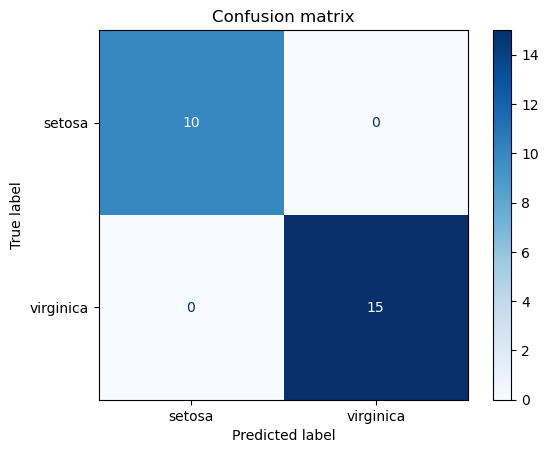

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
        model,
        Xtest,
        ytest,
        cmap=plt.cm.Blues,
        normalize=None,
    )
disp.ax_.set_title("Confusion matrix")

print(disp.confusion_matrix)

plt.show()

An alternative way of plotting a confusion matrix:

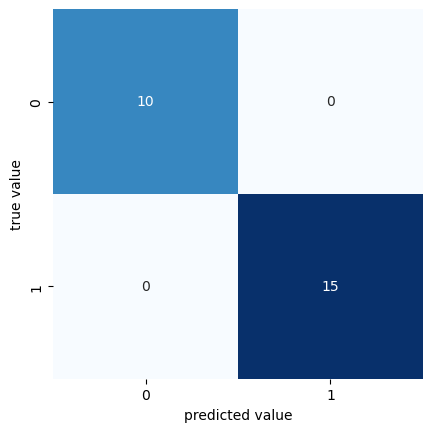

In [80]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()